In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with MPRester("TD3CpcK0oJ60Lhc1ZD") as m:
    struct = m.get_bandstructure_by_material_id("mp-754825")

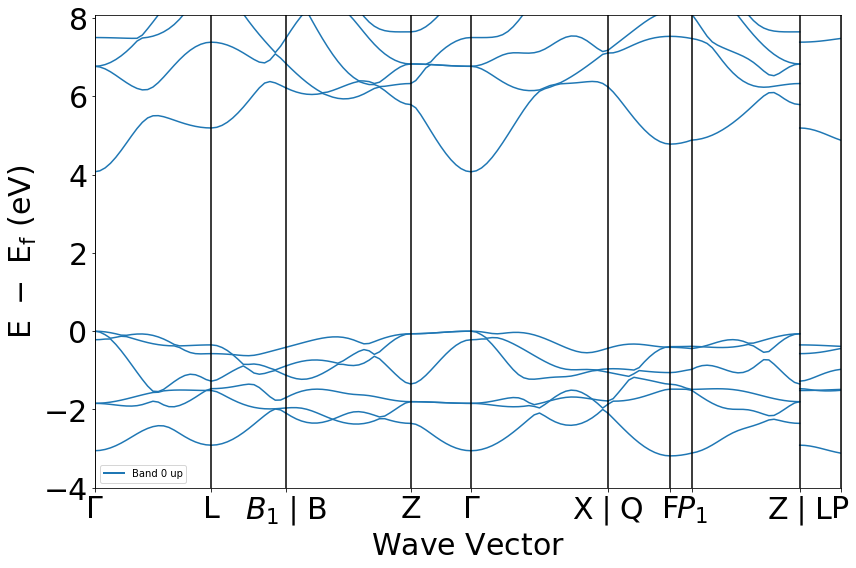

In [6]:
bands = BSPlotter(struct)
bands.show()

In [7]:
#determiner la bande interdite 
print("Bande interdite\n")
print("Bande directe  :", struct.get_band_gap().get('direct'))
print("Energie de la bande interdite [eV] : ",struct.get_band_gap().get('energy'))

Bande interdite

Bande directe  : True
Energie de la bande interdite [eV] :  4.072900000000001


In [8]:
#dispersion des bandes 
info = bands.bs_plot_data()

en = info.get('energy')
distancia1 = info.get('ticks').get('distance')
distancia = np.array([distancia1[0] ,distancia1[1] ,distancia1[3] , distancia1[4] ,distancia1[6] ,distancia1 [8], distancia1[9] ,distancia1[11] ,distancia1[13] ,distancia1[14]])
 

In [9]:
# Distance entre chaque branche :
d = distancia[1:] - distancia[0:-1]
#derniere bande de valence. En notre cas la 13
#pente entre chaque branche 
penteValence = np.zeros(np.shape(d))
for i in range(np.size(d)):
    penteValence[i] = ((en.get('1')[i][13][-1]) - (en.get('1')[i][13][0]))/d[i]


In [10]:
#premeire bande de conduction. En notre cas la 14
penteConduction = np.zeros(np.shape(d))
for x in range(np.size(d)):
    penteConduction[x] = ((en.get('1')[x][14][-1]) - (en.get('1')[x][14][0]))/d[i]
    


In [11]:
maxValence = np.max(abs(penteValence))

minValence = np.min(abs(penteValence))

maxConduction = np.max(abs(penteConduction))

minConduction = np.min(abs(penteConduction))


In [12]:
print("Dernière bande de valence: \n")
print("Direction qui présente le plus de dispersion: ", maxValence)
print("Direction qui présente le moins de dispersion :",minValence)
print(" ")
print("Première bande de conduction : \n")
print("Direction qui présente le plus de dispersion: ", maxConduction)
print("Direction qui présente le moins de dispersion :",minConduction)
print(" ")

Dernière bande de valence: 

Direction qui présente le plus de dispersion:  0.339955533059845
Direction qui présente le moins de dispersion : 0.041096921178204696
 
Première bande de conduction : 

Direction qui présente le plus de dispersion:  5.674055249243818
Direction qui présente le moins de dispersion : 0.2664575463836804
 


Les vecteurs rouges indiquent la plus grande dispersion en chaque bande, et les vecteurs verts indiquent la plus petite dispersion


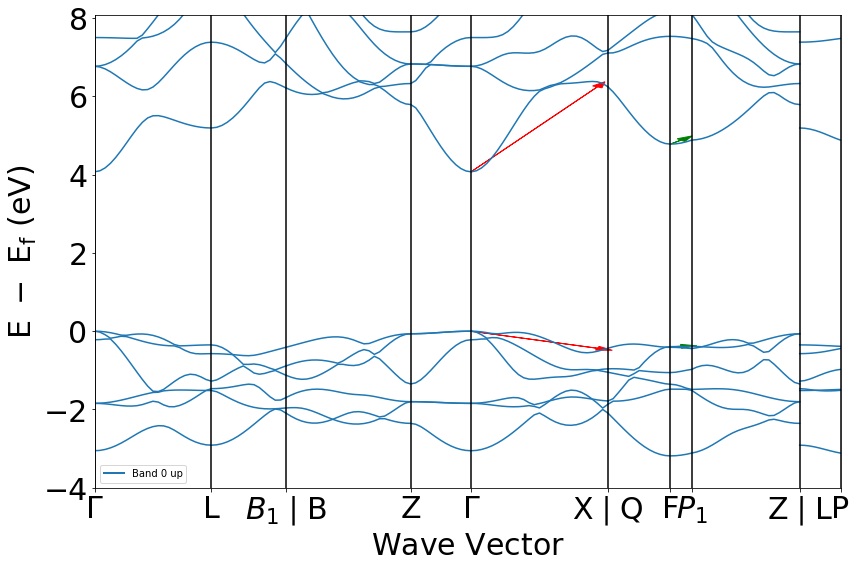

In [13]:
bands.get_plot()
FlechePlusDispVal_maxVal = plt.arrow(distancia[4], en.get('1')[4][13][0], d[4]-0.1,en.get('1')[4][13][-1] - en.get('1')[4][13][0] , color = 'r', head_width = 0.1)
FlechePlusDispVal_minVal = plt.arrow(distancia[6], en.get('1')[6][13][0], d[6]-0.1,en.get('1')[6][13][-1] - en.get('1')[6][13][0], color ='g', head_width = 0.1)
FlechePlusDispVal_maxCon = plt.arrow(distancia[4], en.get('1')[4][14][0], d[4]-0.1,en.get('1')[4][14][-1] - en.get('1')[4][14][0], color ='r', head_width = 0.1)
FlechePlusDispVal_minCon = plt.arrow(distancia[6], en.get('1')[6][14][0], d[6]-0.1,en.get('1')[6][14][-1] - en.get('1')[6][14][0], color ='g', head_width = 0.1)

print("Les vecteurs rouges indiquent la plus grande dispersion en chaque bande, et les vecteurs verts indiquent la plus petite dispersion")

In [14]:
#Masse effective 
#formule = m* = h_barre^2/(dérivé segonde de l'énergie de bande par raport au vecteur k)
h_barre = 1.054571817*(10**-34)
A = 10**-10
eV = 1.602176634*(10**-19)
dis = info.get('distances')
#derniere bande de valence 
#max de la courbe de valence est a distance 0 niveau 0 d'energie
[x1_v,y1_v] = [dis[0][0],en.get('1')[0][13][0]]
#autre point random
[x2_v,y2_v] = [distancia[6], en.get('1')[6][13][4]]

# équation parabole : f(k) = mV*(k-pV)^2
mV = y2_v/(x2_v-x1_v)**2
pV = x1_v

def fV(x):
    return mV*(x-pV)**2
xV = np.arange(-1,10,0.01)
yV = fV(xV)



#premeire bande de conduction
#min de la courbe de conductioest a distance 0 niveau 0 d'energie
[x1_c,y1_c] = [dis[0][0],en.get('1')[0][14][0]]
#autre point random
[x2_c,y2_c] = [distancia[2], en.get('1')[2][13][3]]

# équation parabole : f(k) = mC*(k-pC)^2 + y3
mC = (y2_c-y1_c)/(x2_c-x1_c)**2
pC = x1_c

def fC(x):
    return mC*(x-pC)**2 + y1_c

xC = np.arange(-1,10,0.01)
yC = fC(xC)



In [15]:
#masse effective de la bande de valence 
print('Equation de la parabole : f(k) = ', mV,'* ( k -',pV,')²')
print('Dérivée seconde de la parabole  = ', 2*mV,'[eV.A²]')

print(" ")
print('Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*mV*(A**2)*eV, '[J.m²]')
print(" ")
print('La masse effective est donc :')
print('m* = ',abs((h_barre**2)/(2*mV*(A**2)*eV)),'[kg]')

Equation de la parabole : f(k) =  -0.013301707148824265 * ( k - 0.0 )²
Dérivée seconde de la parabole  =  -0.02660341429764853 [eV.A²]
 
Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :
f''(k) =  -4.2623368772314e-41 [J.m²]
 
La masse effective est donc :
m* =  2.609183059066556e-28 [kg]


In [16]:
#bande de conduction 
print('Equation de la parabole : f(k) = ', mC,'* ( k -',pC,')² + ',y1_c)
print('Dérivée seconde de la parabole : f\'\'(k) = ', 2*mC,'[eV.A²]')

print(" ")
print('Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*mC*(A**2)*eV, '[J.m²]')
print(" ")
print('La masse effective est donc :')
print('m* = ',(h_barre**2)/(2*mC*(A**2)*eV),'[kg]')

Equation de la parabole : f(k) =  -1.3619507681436234 * ( k - 0.0 )² +  4.072900000000001
Dérivée seconde de la parabole : f''(k) =  -2.7239015362872467 [eV.A²]
 
Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :
f''(k) =  -4.3641713947561307e-39 [J.m²]
 
La masse effective est donc :
m* =  -2.5482998182586885e-30 [kg]
